<a href="https://colab.research.google.com/github/urvihp1001/JPMorganQuant/blob/main/JPMC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import matplotlib.dates as mdates
from scipy.stats import norm
import datetime as dt

In [2]:
Loans_df=pd.read_csv('Loan_Data.csv')

In [3]:
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [4]:
Loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [5]:
Loans_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [6]:
Loans_df.tail(10)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
9990,4988839,3,5414.335510,13448.430230,81748.34618,6,559,0
9991,2243629,5,5181.244374,23957.565560,82865.37500,2,559,1
9992,2360357,1,2730.172218,4015.958697,50767.13518,6,569,0
9993,4668682,1,4337.978847,7277.852831,74551.25247,6,728,0
9994,4826911,1,2167.752325,4913.969275,51726.62423,6,672,0
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0
9999,5533570,1,1917.652480,3050.248203,30611.62821,6,757,0


## **Data Visualisations**

---


<br/>
FICO Score means credit score

Text(0.5, 1.0, 'FICO Score Histogram')

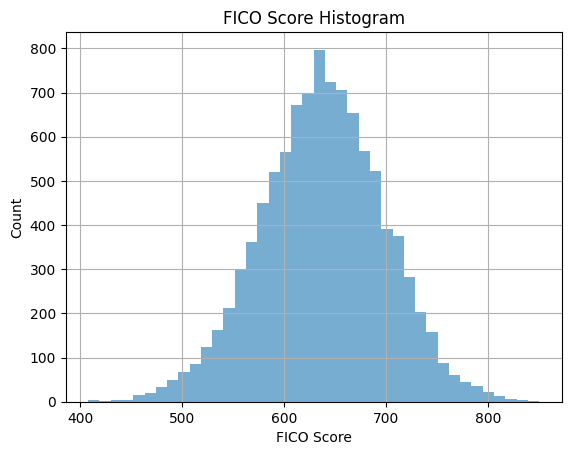

In [7]:
Loans_df['fico_score'].hist(bins=40,alpha=0.6,label='default=1')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
#bins = no. of discrete intervals in graph
#alpha= color intensity

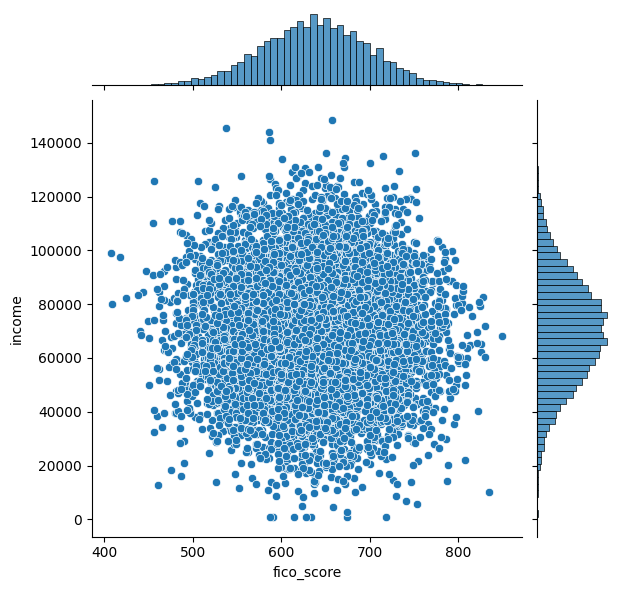

In [8]:
sns.jointplot(x='fico_score',y='income',data=Loans_df,kind='scatter')


#up- fico score distribution
#right- income distribution
#scatterplot to show correlation of fico and income
#weak correlation so circular spread

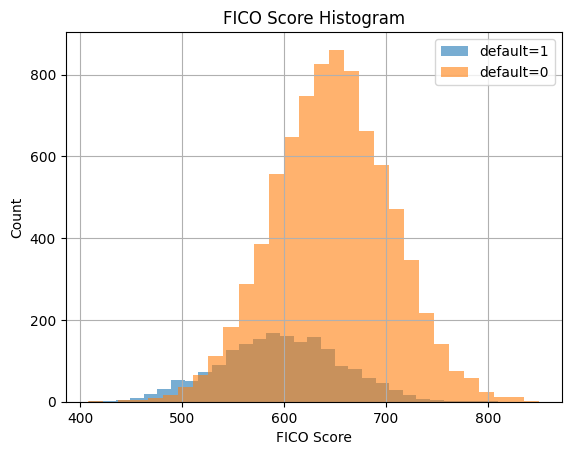

In [11]:
Loans_df[Loans_df['default']==1]['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['fico_score'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()


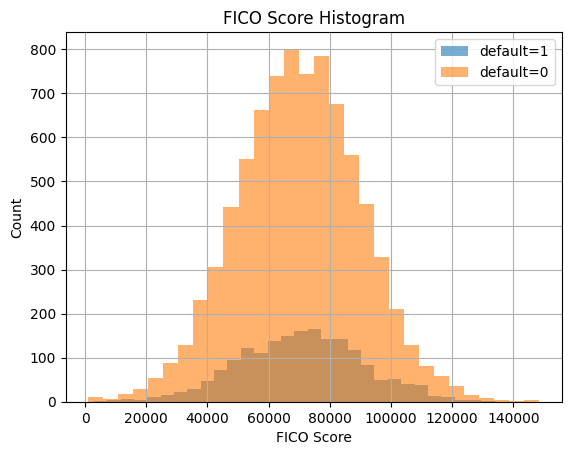

In [12]:
Loans_df[Loans_df['default']==1]['income'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['income'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

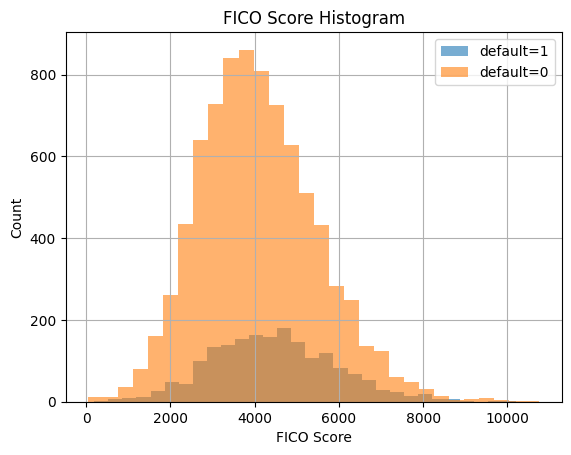

In [14]:
Loans_df[Loans_df['default']==1]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=0')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

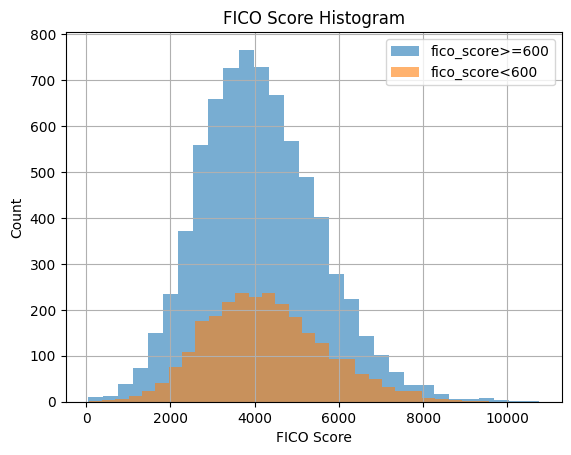

In [15]:
Loans_df[Loans_df['fico_score']>=600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score>=600')
Loans_df[Loans_df['fico_score']<600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score<600')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

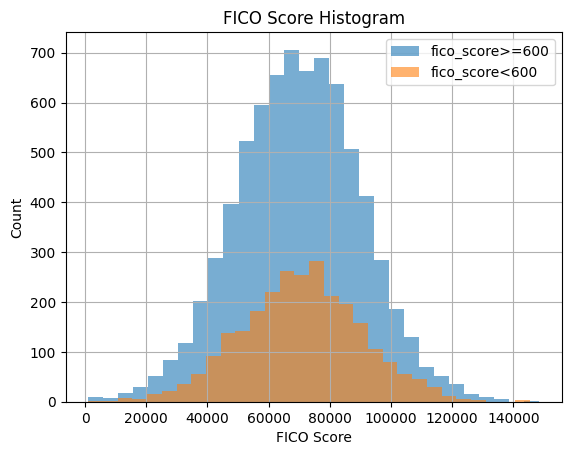

In [16]:
Loans_df[Loans_df['fico_score']>=600]['income'].hist(bins=30,alpha=0.6,label='fico_score>=600')
Loans_df[Loans_df['fico_score']<600]['income'].hist(bins=30,alpha=0.6,label='fico_score<600')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Histogram')
plt.legend()

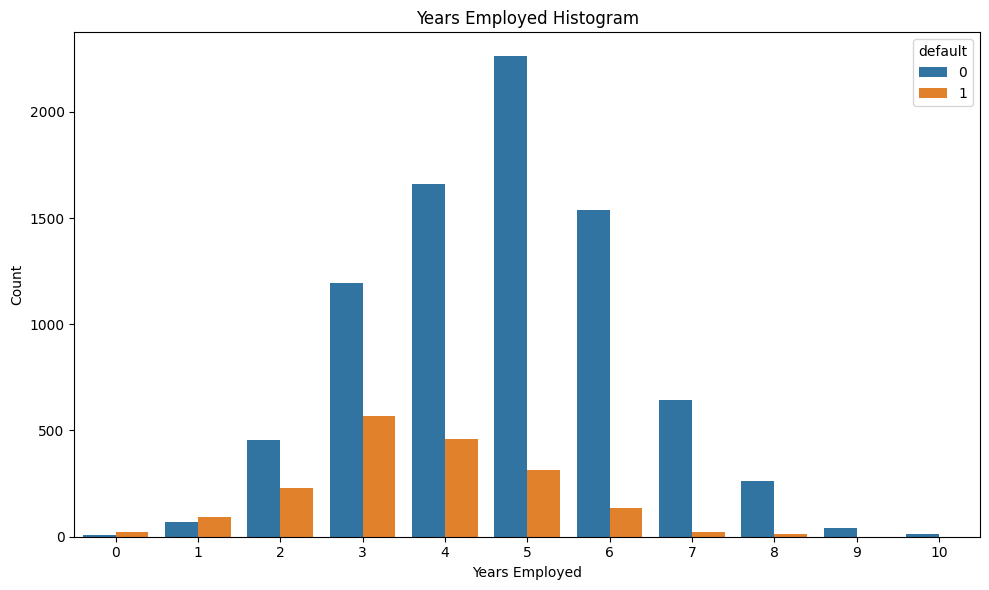

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=Loans_df['years_employed'],data=Loans_df,hue='default')#comparing colors of default=0 or 1 as per no. of yrs employed
plt.xlabel('Years Employed')
plt.ylabel('Count')
plt.title('Years Employed Histogram')
plt.tight_layout()

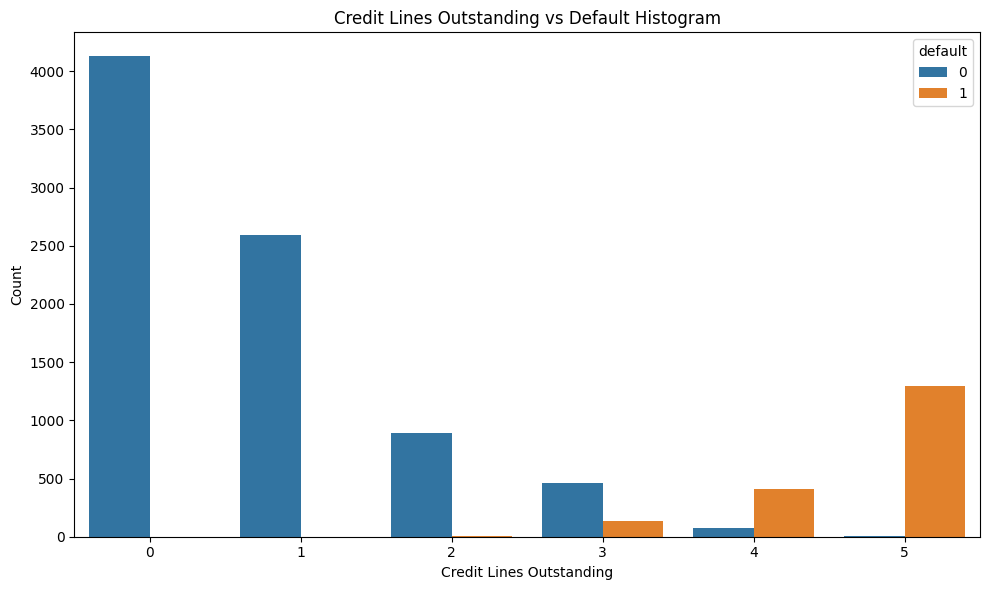

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x=Loans_df['credit_lines_outstanding'],data=Loans_df,hue='default')#comparing colors of default=0 or 1 as per no. of yrs employed
plt.xlabel('Credit Lines Outstanding')
plt.ylabel('Count')
plt.title('Credit Lines Outstanding vs Default Histogram')
plt.tight_layout()